## Dataset Split <a class="anchor" id="topo"></a>

In this notebook, the dataset is split into 5 parts: first, we split in pretext / downstream sets, then the pretext set in further split into training and validation, and the downstream set is split into training, validation and test. Each resulting set in then analyzed to check the balancing between classes and genders.

### Summary

* [Part 1: Notebook setup](#part_01)
* [Part 2: Dataset split](#part_02)
* [Part 3: Balancing analysis](#part_03)

### Part 1: Notebook Setup <a class="anchor" id="part_01"></a>

In this section, the necessary libraries are imported, the global variables are assigned and all functions are defined.

In [1]:
# Import and configure libraries
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()

# Move to the root directory of the project
if 'notebooks' in os.getcwd():
    os.chdir('../..')

# Import custom functions
from src.utils.dataset import split_full_dataset

# Set path
PATH_TO_DATASET = os.path.join(os.getcwd(), "datasets/release")

print("Done!")

Done!


In [2]:
# Function to plot the total minutes per class and gender
def plot_minutes_by_class_and_gender(data: pd.DataFrame, title: str) -> None:
    # Group data by class and gender and sum durations
    grouped_data = data.groupby(["label", "gender"])["duration"].sum().reset_index()
    grouped_data["duration"] = grouped_data["duration"] / 60  # Convert to minutes

    # Create the bar plot using Seaborn
    plt.figure(figsize=(6, 6))
    sns.barplot(
        data=grouped_data,
        x="label",  # Group by class
        y="duration",  # Total duration in minutes
        hue="gender",  # Separate bars by gender
        palette={"M": "royalblue", "F": "tomato"},
    )

    # Customize the plot
    plt.title(f"Total Minutes per Class and Gender - {title}", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Total Duration (Minutes)", fontsize=12)
    plt.legend(title="Gender")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y")
    plt.tight_layout()

    # Show the plot
    plt.show()


# Function to generate some balancing metrics for a dataset
def generate_balancing_metrics(data: pd.DataFrame) -> None:
    # Calculate counts by gender
    spoof_per_gender    = data[data.label == "spoof"].groupby("gender").duration.count()
    bonafide_per_gender = data[data.label == "bona-fide"].groupby("gender").duration.count()

    # Combine counts into a DataFrame
    counts_df = pd.DataFrame({
        "spoof_count": spoof_per_gender,
        "bona_fide_count": bonafide_per_gender
    }).fillna(0)

    # Add overall counts to the DataFrame
    overall_counts = {
        "spoof_count": data[data.label == "spoof"].duration.count(),
        "bona_fide_count": data[data.label == "bona-fide"].duration.count()
    }
    counts_df.loc["Total"] = overall_counts

    # Calculate total count and spoof ratio
    counts_df["total"] = counts_df["spoof_count"] + counts_df["bona_fide_count"]
    counts_df["spoof_ratio"] = counts_df["spoof_count"] / counts_df["total"]

    # Display results
    print(counts_df)


print("Done!")

Done!


### Part 2: Dataframe Split <a class="anchor" id="part_02"></a>

In this section, the dataset csv file is loaded into a pandas dataframe and divided in 5 subsets: pretext task training and validation, and downstream task training, validation and test.

In [3]:
people_dataset_path = os.path.join(PATH_TO_DATASET, "people-metadata.csv")
files_dataset_path = os.path.join(PATH_TO_DATASET, "files-metadata_duration.csv")

# Full dataset: 60% pretrain, 40% downstream
# Pretrain: 80% train, 20% val
pretext_train_percentage   = 0.6 * 0.8
pretext_val_percentage     = 0.6 * 0.2
# Downstream: 70% train, 20% val, 10% test
downstream_train_percentage = 0.4 * 0.7
downstream_val_percentage   = 0.4 * 0.2
downstream_test_percentage  = 0.4 * 0.1

random_state                = 7

split_full_dataset(people_dataset_path, files_dataset_path, pretext_train_percentage, pretext_val_percentage, downstream_train_percentage, downstream_val_percentage, downstream_test_percentage, random_state)

Splitting dataset /home/lozavival/Documents/AUDIOS/datasets/release/people-metadata.csv...
Saving split datasets in /home/lozavival/Documents/AUDIOS/datasets/release/...
Done!


### Part 3: Balancing analysis <a class="anchor" id="part_03"></a>

In this section, we make an analysis of the resulting sets to check if it is balanced in regards to class (spoof and bona-fide) and gender (male and female).

In [4]:
# Load the split datasets
pretext_train_df    = pd.read_csv(os.path.join(PATH_TO_DATASET, "files-pretext_train.csv"), keep_default_na=False)
pretext_val_df      = pd.read_csv(os.path.join(PATH_TO_DATASET, "files-pretext_val.csv"), keep_default_na=False)
downstream_train_df = pd.read_csv(os.path.join(PATH_TO_DATASET, "files-downstream_train.csv"), keep_default_na=False)
downstream_val_df   = pd.read_csv(os.path.join(PATH_TO_DATASET, "files-downstream_val.csv"), keep_default_na=False)
downstream_test_df  = pd.read_csv(os.path.join(PATH_TO_DATASET, "files-downstream_test.csv"), keep_default_na=False)

print("Done!")

Done!


In [5]:
# Generate some metrics for each dataset
print("PRETEXT TRAINING:")
generate_balancing_metrics(pretext_train_df)

print("\n------------------------------\n")

print("PRETEXT VALIDATION:")
generate_balancing_metrics(pretext_val_df)

print("\n------------------------------\n")

print("DOWNSTREAM TRAINING:")
generate_balancing_metrics(downstream_train_df)

print("\n------------------------------\n")

print("DOWNSTREAM VALIDATION:")
generate_balancing_metrics(downstream_val_df)

print("\n------------------------------\n")

print("DOWNSTREAM TESTING:")
generate_balancing_metrics(downstream_test_df)

PRETEXT TRAINING:
        spoof_count  bona_fide_count  total  spoof_ratio
gender                                                  
F             19324            21998  41322     0.467644
M             18130            20000  38130     0.475479
Total         37454            41998  79452     0.471404

------------------------------

PRETEXT VALIDATION:
        spoof_count  bona_fide_count  total  spoof_ratio
gender                                                  
F              5249             6000  11249     0.466619
M              4307             5000   9307     0.462770
Total          9556            11000  20556     0.464876

------------------------------

DOWNSTREAM TRAINING:
        spoof_count  bona_fide_count  total  spoof_ratio
gender                                                  
F             10722            13000  23722     0.451985
M             10462            12000  22462     0.465764
Total         21184            25000  46184     0.458687

-------------------

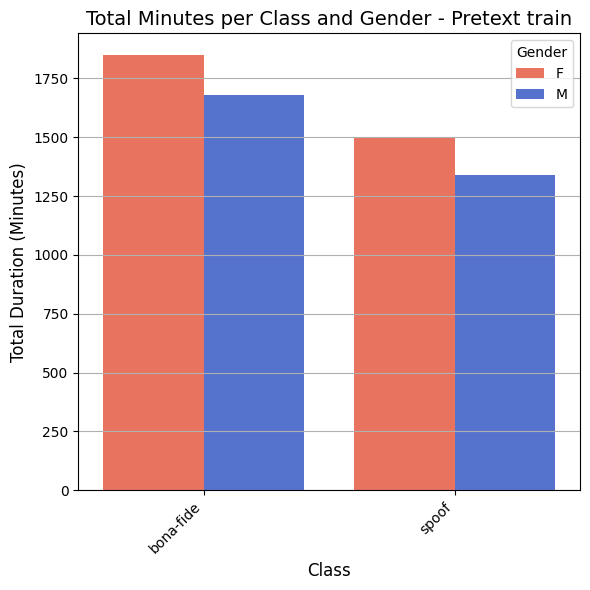

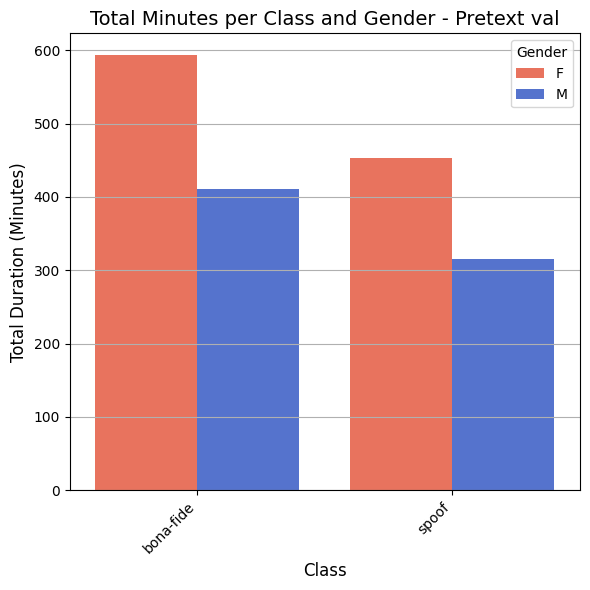

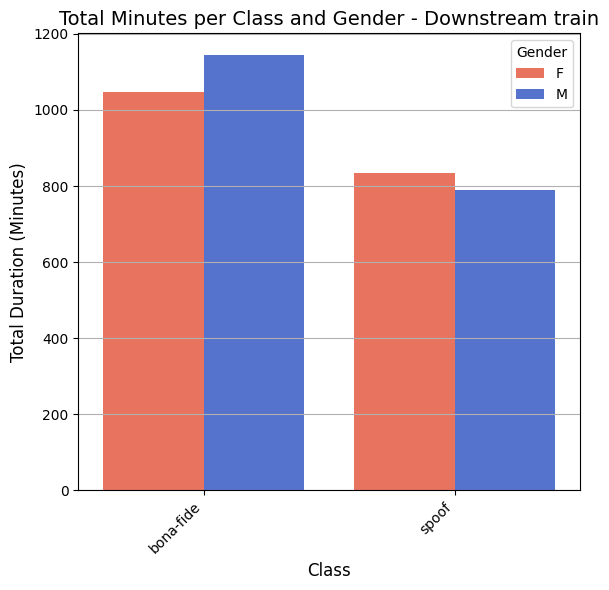

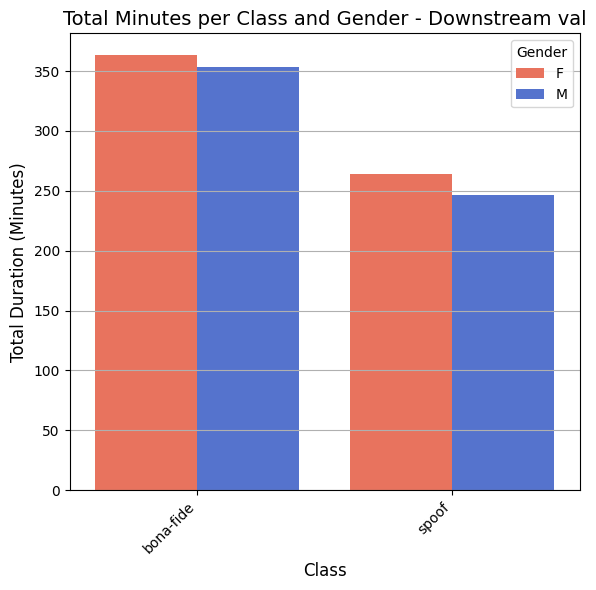

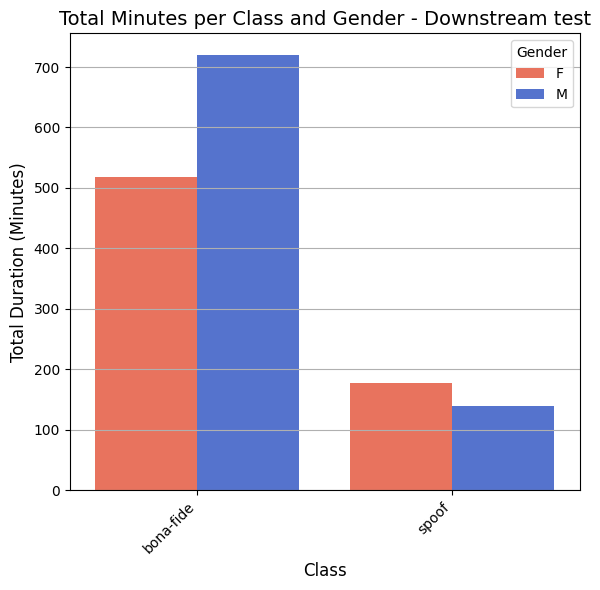

In [6]:
# Plot the barcharts for each dataset
plot_minutes_by_class_and_gender(pretext_train_df, "Pretext train")
plot_minutes_by_class_and_gender(pretext_val_df, "Pretext val")
plot_minutes_by_class_and_gender(downstream_train_df, "Downstream train")
plot_minutes_by_class_and_gender(downstream_val_df, "Downstream val")
plot_minutes_by_class_and_gender(downstream_test_df, "Downstream test")

[Back to top](#topo)